In [20]:
import MDAnalysis as mda
import scipy
from MDAnalysis import *
from MDAnalysis.analysis import distances
from MDAnalysis.analysis import contacts
from MDAnalysis.lib.distances import distance_array
from MDAnalysis.lib.distances import calc_bonds
from MDAnalysis.analysis import align
import nglview as nv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
import MDAnalysis
u = MDAnalysis.Universe("step4.1_equilibration.gro","step5_noPBC.xtc")  # always start with a Universe
#sel_bpa = 'resid 143 144 166 167 215 277'
#sel_bpb = 'resid 67 304 305 306 307 384'
#sel_common = 'resid 65 103 142 165 278 302'
sel_bpa = 'resid 84 123 124 125 147 148 196 258'
sel_bpb = 'resid 286 288 307 308 363 364'
sel_common = 'resid 48 146 259 283 284 287'
sel_ligand = 'resname AGLC'
sel_r100 = 'resid 100'
protein = u.select_atoms('protein')
pl = u.select_atoms('protein and resname AGLC')
bpa = u.select_atoms(sel_bpa)
bpb= u.select_atoms(sel_bpb)
bpc= u.select_atoms(sel_common)
lig = u.select_atoms(sel_ligand)
r100 = u.select_atoms(sel_r100)
#pl = u.select_atoms(protein lig)

In [7]:
print(len(lig.atoms))
print(len(r100.atoms))
print(len(bpa.atoms))
print(len(bpa.residues))
print(len(bpa.residues))


24
12
122
8
8


In [74]:
view = nv.show_mdanalysis(u)
#view.add_licorice(lig)
#view.add_licorice(bpa)
view.clear()
view.add_cartoon(protein)
#view.add_ball_and_stick('not_protein')

In [8]:

l=[]
#print(len(d))
#print(d[0])
for frame in ts:
    d = distances.distance_array(lig.positions, bpa.positions)
    x=0
    min_for_atoms = []
    for e in d:
        min_for_atoms.append(min(d[x]))
        x=x+1
    l.append(min(min_for_atoms))

#print (l)
#print (min_for_atoms)
#print(min(min_for_atoms))

NameError: name 'ts' is not defined

In [9]:
d = distances.distance_array(lig.positions, bpa.positions)
#print(len(d))
#print(d[0])
x=0
min_for_atoms = []
for e in d:
    min_for_atoms.append(min(d[x]))
    x=x+1
print (min_for_atoms)
print(min(min_for_atoms))

[2.7562891380719283, 3.2407928047894945, 2.175710809428849, 2.53483735174313, 2.76886215472907, 2.1209677786962735, 2.481716066808012, 3.6179575196210787, 4.074904003680095, 3.034367227224973, 3.0862393261292396, 3.0742532434409107, 2.29586944866075, 2.509438093299357, 2.6175205874820078, 2.928502847475251, 2.4394661322503706, 1.9195082686536216, 2.258698273891678, 3.163871537450259, 2.204381620242111, 2.6573118804641642, 2.7571201708241713, 2.563299962667656]
1.9195082686536216


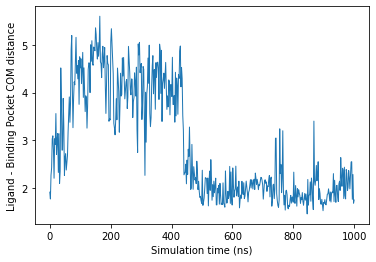

In [70]:
com_distances_a = np.empty(u.trajectory.n_frames)
times = com_distances_a.copy()
for i, ts in enumerate(u.trajectory):
    da = distances.distance_array(lig.positions, bpa.positions, box=u.dimensions)
    x=0
    min_for_atoms = []
    for e in da:
        min_for_atoms.append(min(da[x]))
        x=x+1
    com_distances_a[i] = min(min_for_atoms)
    times[i] = ts.time / 1000 # get time in ns
plt.ylabel('Ligand - BPB COM distance')
plt.xlabel('Simulation time (ns)')
from scipy.interpolate import make_interp_spline
x = times
y1 = com_distances_a
Spline1 = make_interp_spline(x, y1)
X_ = np.linspace(x.min(), x.max(), 500)
Y1 = Spline1(X_)
plt.ylabel('Ligand - Binding Pocket COM distance')
plt.xlabel('Simulation time (ns)')
plt.plot(X_, Y1, linewidth=1, label="BPA")

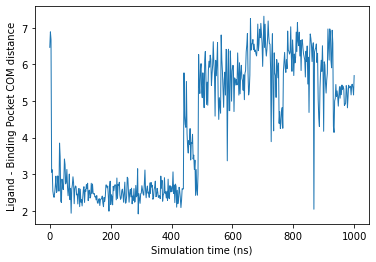

In [161]:
com_distances_b = np.empty(u.trajectory.n_frames)
times = com_distances_b.copy()
for i, ts in enumerate(u.trajectory):
    da = distances.distance_array(lig.positions, bpb.positions)
    x=0
    min_for_atoms = []
    for e in da:
        min_for_atoms.append(min(da[x]))
        x=x+1
    com_distances_b[i] = min(min_for_atoms)
    times[i] = ts.time / 1000 # get time in ns
from scipy.interpolate import make_interp_spline
x = times
y1 = com_distances_b
Spline1 = make_interp_spline(x, y1)
X_ = np.linspace(x.min(), x.max(), 500)
Y1 = Spline1(X_)
plt.ylabel('Ligand - Binding Pocket COM distance')
plt.xlabel('Simulation time (ns)')
plt.plot(X_, Y1, linewidth=1, label="BPB")

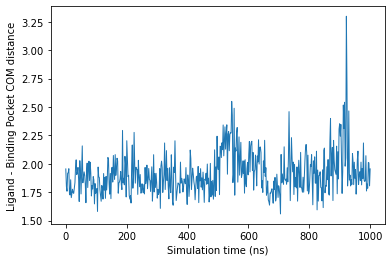

In [162]:
com_distances_c = np.empty(u.trajectory.n_frames)
times = com_distances_c.copy()
for i, ts in enumerate(u.trajectory):
    da = distances.distance_array(lig.positions, bpc.positions)
    x=0
    min_for_atoms = []
    for e in da:
        min_for_atoms.append(min(da[x]))
        x=x+1
    com_distances_c[i] = min(min_for_atoms)
    times[i] = ts.time / 1000 # get time in ns
from scipy.interpolate import make_interp_spline
x = times
y1 = com_distances_c
Spline1 = make_interp_spline(x, y1)
X_ = np.linspace(x.min(), x.max(), 500)
Y1 = Spline1(X_)
plt.ylabel('Ligand - Binding Pocket COM distance')
plt.xlabel('Simulation time (ns)')
plt.plot(X_, Y1, linewidth=1, label="BPB")

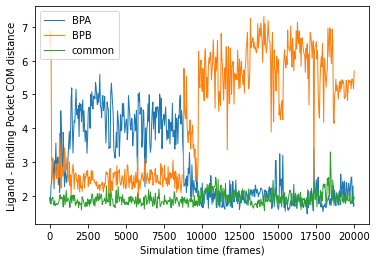

In [163]:
x = times*20
y1 = com_distances_a
y2 = com_distances_b
y3 = com_distances_c

Spline1 = make_interp_spline(x, y1)
Spline2 = make_interp_spline(x, y2)
Spline3 = make_interp_spline(x, y3)

X_ = np.linspace(x.min(), x.max(), 500)
Y1 = Spline1(X_) 
Y2 = Spline2(X_) 
Y3 = Spline3(X_) 
#plt.plot(times, com_distances_a, times, com_distances_b, times, com_distances_c, linewidth=0.3)
plt.ylabel('Ligand - Binding Pocket COM distance')
plt.xlabel('Simulation time (frames)')
#plt.plot(X_, Y1, X_, Y2, X_, Y3, linewidth=1)
plt.plot(X_, Y1, linewidth=1, label="BPA")
plt.plot(X_, Y2, linewidth=1, label="BPB")
plt.plot(X_, Y3, linewidth=1, label="common")
plt.legend()

In [144]:
print(com_distances)
print(u.trajectory.n_frames)

[6.16490588 6.16490588 6.16490588 ... 6.16490588 6.16490588 6.16490588]
20001


In [ ]:
com_distances = np.empty(u.trajectory.n_frames)
dist_arrA = np.empty(u.trajectory.n_frames)
func = distances.distance_array(bpa_com, # reference
                lig_com, # configuration
                box=u.dimensions)
times = com_distances.copy()
for i, ts in enumerate(u.trajectory):
    func
    dist_arrA[i] = min(func)
    times[i] = ts.time / 1000 # get time in ns
#plt.plot(times, dist_arrA)
plt.ylabel('Ligand - BPB COM distance')
plt.xlabel('Simulation time (ns)')
from scipy.interpolate import make_interp_spline
x = times
y1 = dist_arrA
Spline1 = make_interp_spline(x, y1)
X_ = np.linspace(x.min(), x.max(), 500)
Y1 = Spline1(X_)
plt.ylabel('Ligand - Binding Pocket COM distance')
plt.xlabel('Simulation time (ns)')
plt.plot(X_, Y1, linewidth=1, label="BPA")